In [115]:
import json
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [116]:
with open("data/trump_data.json", "r") as file:
    trump_data = json.load(file)

with open("data/pepe_data.json", "r") as file:
    pepe_data = json.load(file)

with open("data/spx_data.json", "r") as file:
    spx_data = json.load(file)

In [117]:
# [present -> past] | [max_step -> min_step]
data = torch.tensor(trump_data['data']['attributes']['ohlcv_list'], dtype=torch.float32)  # AFTER_DEBUG: there's holes in data and intervals between points aren't the same!
# [past -> present] | [min_step -> max_step]
data = torch.flip(data, dims=[0])

X = data[:, 0]  # timesteps as inputs
Y = data[:, 4]  # close values as targets
# min-max normalization
min_step, max_step = X[0].item(), X[-1].item()  # AFTER_DEBUG: perhaps trying Z-Score
Xn = (X - min_step) / (max_step - min_step)

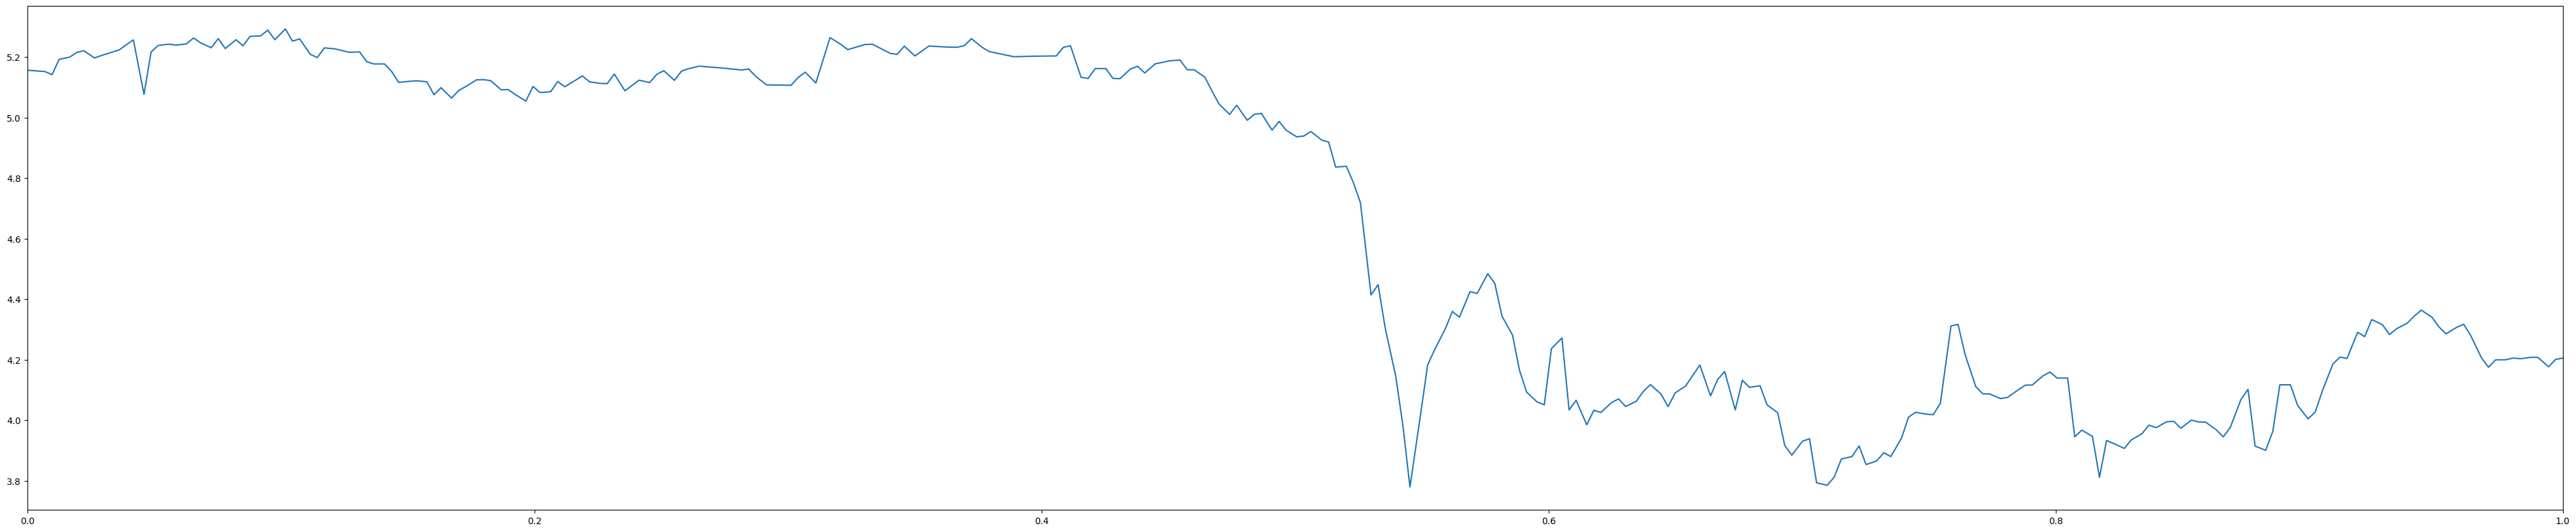

In [118]:
# Approximated function
plt.figure(figsize=(50, 10))
plt.plot(Xn, Y)
plt.margins(x=0);

In [138]:
class MLP(nn.Module):

    def __init__(self, hidden_ns: list) -> None:
        super().__init__()
        
        layers = [nn.Linear(1, hidden_ns[0]), nn.ReLU()]  # input layer + relu
        for n0, n1 in zip(hidden_ns[:-1], hidden_ns[1:]):  # hidden layers + relus
            layers.extend([nn.Linear(n0, n1), nn.ReLU()])
        layers.append(nn.Linear(hidden_ns[-1], 1))  # output layer

        self.layers = nn.Sequential(*layers)  # stack layers
    
    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.layers(x)

In [139]:
hidden_neurons = [5, 10, 5]
model = MLP(hidden_neurons)
for layer in model.children():
    print(layer)

Sequential(
  (0): Linear(in_features=1, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=5, bias=True)
  (5): ReLU()
  (6): Linear(in_features=5, out_features=1, bias=True)
)


In [150]:
val = torch.tensor([[0], [0], [0]], dtype=torch.float32)
val

tensor([[0.],
        [0.],
        [0.]])

In [151]:
model(val)

tensor([[-0.1845],
        [-0.1845],
        [-0.1845]], grad_fn=<AddmmBackward0>)